In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -U kaleido



In [3]:
fastfood = pd.read_csv("FastFoodRestaurants.csv", low_memory=False)
fastfood.head()


,address,city,country,keys,latitude,longitude,name,postalCode,province,websites
0,324 Main St,Massena,US,us/ny/massena/324mainst/-1161002137,44.92130,-74.89021,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
1,530 Clinton Ave,Washington Court House,US,us/oh/washingtoncourthouse/530clintonave/-7914...,39.53255,-83.44526,Wendy's,43160,OH,http://www.wendys.com
2,408 Market Square Dr,Maysville,US,us/ky/maysville/408marketsquaredr/1051460804,38.62736,-83.79141,Frisch's Big Boy,41056,KY,"http://www.frischs.com,https://www.frischs.com..."
3,6098 State Highway 37,Massena,US,us/ny/massena/6098statehighway37/-1161002137,44.95008,-74.84553,McDonald's,13662,NY,"http://mcdonalds.com,http://www.mcdonalds.com/..."
4,139 Columbus Rd,Athens,US,us/oh/athens/139columbusrd/990890980,39.35155,-82.09728,OMG! Rotisserie,45701,OH,"http://www.omgrotisserie.com,http://omgrotisse..."


In [4]:
obesity = pd.read_csv("obesity.csv")
obesity.head()

,OBJECTID,NAME,Obesity,Shape__Area,Shape__Length
0,1,Texas,32.4,7.670000e+12,1.540832e+07
1,2,California,24.2,5.330000e+12,1.451870e+07
2,3,Kentucky,34.6,1.130000e+12,6.346699e+06
3,4,Georgia,30.7,1.650000e+12,5.795596e+06
4,5,Wisconsin,30.7,1.570000e+12,6.806782e+06


In [5]:
obesity.columns

Index(['OBJECTID', 'NAME', 'Obesity', 'Shape__Area', 'Shape__Length'], dtype='object')

In [6]:
fastfood.columns

Index(['address', 'city', 'country', 'keys', 'latitude', 'longitude', 'name',
       'postalCode', 'province', 'websites'],
      dtype='object')

In [7]:
#Cleaning fast food dataset 
ff = fastfood[['province', 'latitude', 'longitude']].copy()


ff = ff.dropna(subset=['province'])


ff['province'] = ff['province'].str.upper().str.strip()

ff.head()


,province,latitude,longitude
0,NY,44.92130,-74.89021
1,OH,39.53255,-83.44526
2,KY,38.62736,-83.79141
3,NY,44.95008,-74.84553
4,OH,39.35155,-82.09728


In [8]:
# of Fast Food Restaurants per State
restaurants_per_state = (
    ff.groupby('province')
      .size()
      .reset_index(name='restaurant_count')
)
restaurants_per_state.head()


,province,restaurant_count
0,AK,14
1,AL,236
2,AR,151
3,AZ,208
4,CA,676


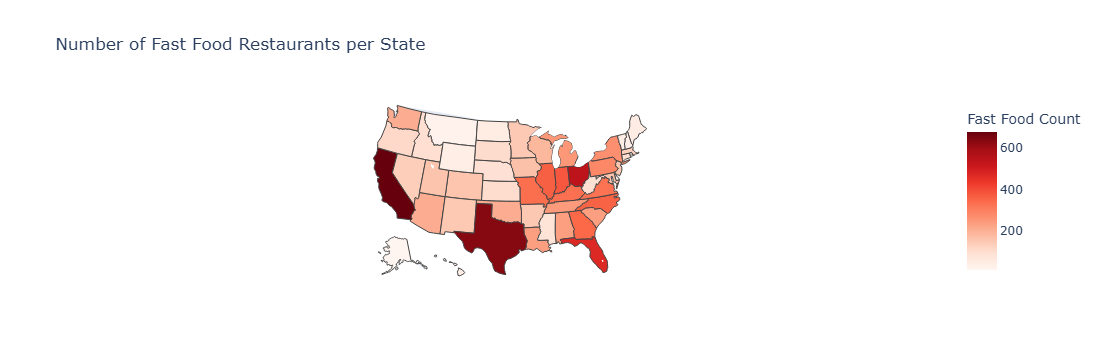

In [16]:
#Fast Food Restaurants per State Choropleth map

import plotly.express as px
!pip install -U plotly

!pip install -U kaleido


fig = px.choropleth(
    restaurants_per_state,
    locations='province',            
    locationmode='USA-states',
    color='restaurant_count',
    color_continuous_scale='Reds',
    scope='usa',
    labels={'restaurant_count':'Fast Food Count'},
    title='Number of Fast Food Restaurants per State'
)

fig.show()
fig.write_image("fastfood_choropleth.svg", format="svg")



In [10]:
#Clean Obesity Dataset

obesity_clean = obesity[['NAME', 'Obesity']].copy()


obesity_clean = obesity_clean.rename(columns={
    'NAME': 'state_name',
    'Obesity': 'obesity_rate'
})


obesity_clean['state_name'] = obesity_clean['state_name'].str.strip()


obesity_clean['obesity_rate'] = pd.to_numeric(
    obesity_clean['obesity_rate'],
    errors='coerce'
)


obesity_clean = obesity_clean.dropna(subset=['obesity_rate'])


obesity_clean.head()


,state_name,obesity_rate
0,Texas,32.4
1,California,24.2
2,Kentucky,34.6
3,Georgia,30.7
4,Wisconsin,30.7


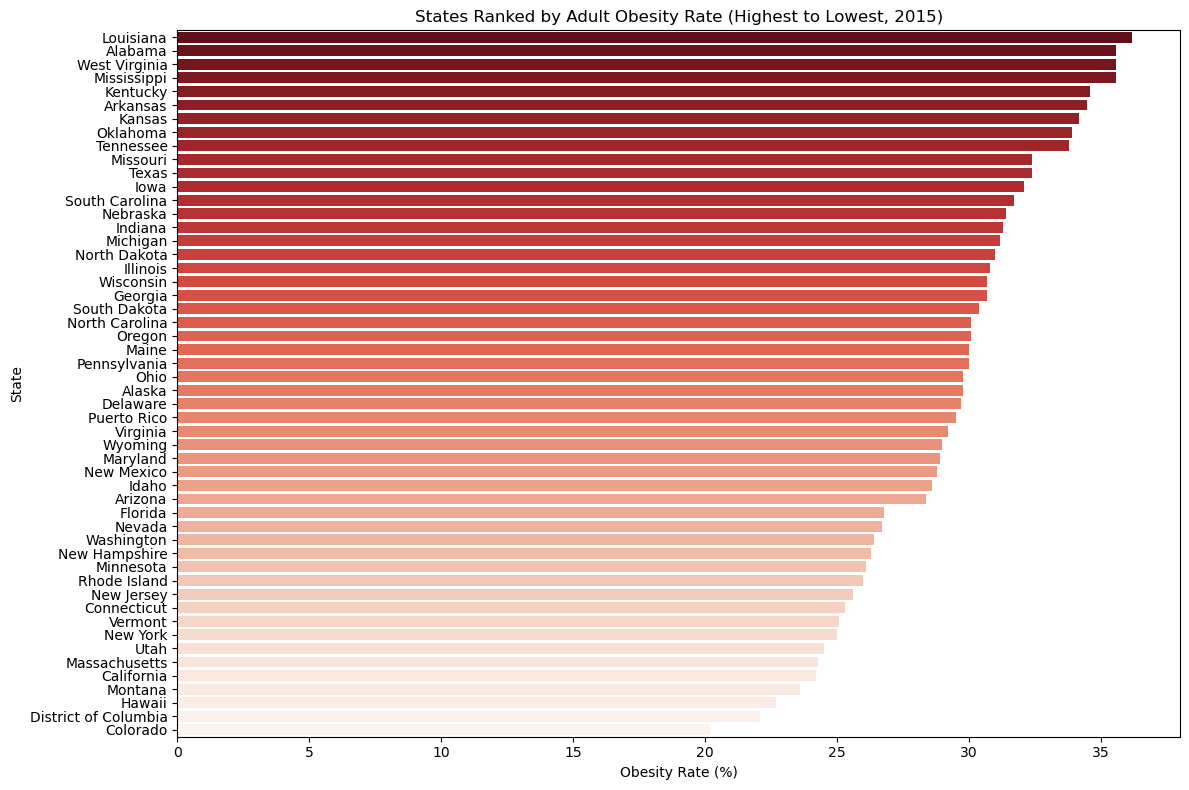

In [17]:
#Obesity Rate per State Bar Chart
obesity_sorted = obesity_clean.sort_values('obesity_rate', ascending=False)

plt.figure(figsize=(12, 8))

sns.barplot(
    data=obesity_sorted,
    x='obesity_rate',
    y='state_name',
    hue='state_name',          
    palette='Reds_r',
    dodge=False,
    legend=False                
)

plt.title("States Ranked by Adult Obesity Rate (Highest to Lowest, 2015)")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("State")
plt.tight_layout()
plt.savefig("obesity_ranked_bar.svg", format="svg", bbox_inches="tight")

plt.show()

In [12]:
# Map state abbreviations to full names
state_map = {
    'AL': 'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California',
    'CO':'Colorado','CT':'Connecticut','DE':'Delaware','FL':'Florida','GA':'Georgia',
    'HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa','KS':'Kansas',
    'KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachusetts',
    'MI':'Michigan','MN':'Minnesota','MS':'Mississippi','MO':'Missouri','MT':'Montana',
    'NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey','NM':'New Mexico',
    'NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma',
    'OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina',
    'SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont',
    'VA':'Virginia','WA':'Washington','WV':'West Virginia','WI':'Wisconsin','WY':'Wyoming'
}

restaurants_per_state['state_name'] = restaurants_per_state['province'].map(state_map)
restaurants_per_state = restaurants_per_state.dropna(subset=['state_name'])



In [13]:
#Merge fast food and obesity datasets
merged = restaurants_per_state.merge(
    obesity_clean,
    on='state_name',
    how='inner'
)

merged.head()



,province,restaurant_count,state_name,obesity_rate
0,AK,14,Alaska,29.8
1,AL,236,Alabama,35.6
2,AR,151,Arkansas,34.5
3,AZ,208,Arizona,28.4
4,CA,676,California,24.2


In [14]:
# compute correlation coefficient between # of fast food restaurants per state and obesity rate 
corr = merged['restaurant_count'].corr(merged['obesity_rate'])
corr


np.float64(0.1299978355659935)

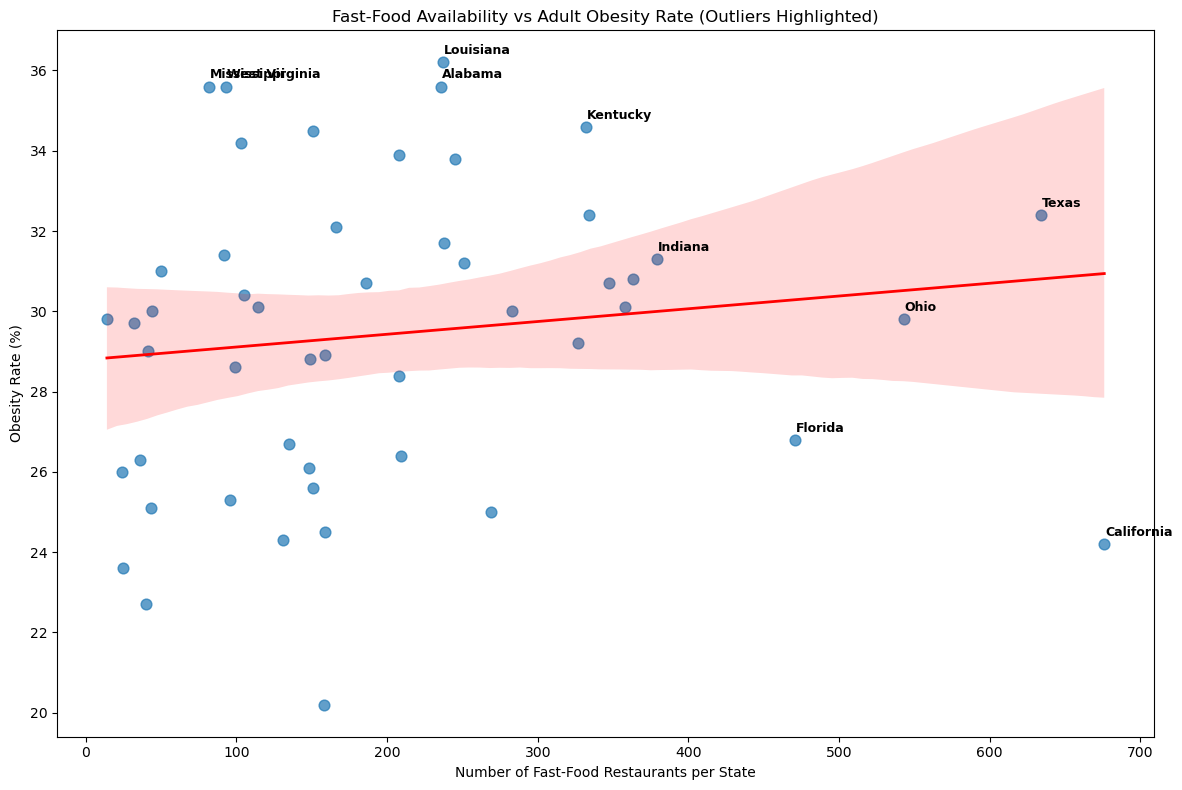

In [18]:
#Merged Data - Scatter Plot with Regression Line & Outliers Labeled

plt.figure(figsize=(12, 8))


sns.regplot(
    data=merged,
    x='restaurant_count',
    y='obesity_rate',
    scatter_kws={'s': 60, 'alpha': 0.7},
    line_kws={'color': 'red', 'linewidth': 2}
)


high_obesity_threshold = merged['obesity_rate'].quantile(0.90)
high_restaurant_threshold = merged['restaurant_count'].quantile(0.90)

for i, row in merged.iterrows():
    if row['obesity_rate'] >= high_obesity_threshold or \
       row['restaurant_count'] >= high_restaurant_threshold:
        
        plt.text(
            row['restaurant_count'] + 0.5,
            row['obesity_rate'] + 0.2,
            row['state_name'],
            fontsize=9,
            fontweight='bold'
        )

plt.title("Fast-Food Availability vs Adult Obesity Rate (Outliers Highlighted)")
plt.xlabel("Number of Fast-Food Restaurants per State")
plt.ylabel("Obesity Rate (%)")
plt.tight_layout()
plt.savefig("merged_scatter_outliers.svg", format="svg", bbox_inches="tight")
plt.show()
